## Context

This is the dataset is a modified version of the California Housing Data used in the paper Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being too toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

## Source

This data was entirely modified and cleaned by: https://www.kaggle.com/fedesoriano. The original data (without the distance features) was initially featured in the following paper:
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

The original dataset can be found under the following link: https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

## Modifications with respect to the original data

This dataset includes 5 extra features defined by https://www.kaggle.com/fedesoriano : "Distance to coast", "Distance to Los Angeles", "Distance to San Diego", "Distance to San Jose", and "Distance to San Francisco". These extra features try to account for the distance to the nearest coast and the distance to the centre of the largest cities in California.

The distances were calculated using the Haversine formula with the Longitude and Latitude:

https://wikimedia.org/api/rest_v1/media/math/render/svg/a65dbbde43ff45bacd2505fcf32b44fc7dcd8cc0

where:

* phi_1 and phi_2 are the Latitudes of point 1 and point 2, respectively;
* lambda_1 and lambda_2 are the Longitudes of point 1 and point 2, respectively;
* r is the radius of the Earth (6371km);

## Data set summary

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The columns are as follows, their names are pretty self-explanatory:

* 1) Median House Value: Median house value for households within a block (measured in US Dollars);
* 2) Median Income: Median income for households within a block of houses (measured in tens of thousands of US Dollars) `10k$`
* 3) Median Age: Median age of a house within a block; a lower number is a newer building [years];
* 4) Total Rooms: Total number of rooms within a block;
* 5) Total Bedrooms: Total number of bedrooms within a block;
* 6) Population: Total number of people residing within a block;
* 7) Households: Total number of households, a group of people residing within a home unit, for a block;
* 8) Latitude: A measure of how far north a house is; a higher value is farther north [°];
* 9) Longitude: A measure of how far west a house is; a higher value is farther west [°];
* 10) Distance to coast: Distance to the nearest coast point [m];
* 11) Distance to Los Angeles: Distance to the centre of Los Angeles [m];
* 12) Distance to San Diego: Distance to the centre of San Diego [m];
* 13) Distance to San Jose: Distance to the centre of San Jose [m];
* 14) Distance to San Francisco: Distance to the centre of San Francisco [m].

## Main objective

Training a model that is balanced and can generalize well on the new incoming data, avoid overfitting and also underfitting and find the best parameters to use on this dataset for a linear regression model. (paynomial featuring, standardization, regularization)

Can I do it?

## Importing libraries and loading up the tools 

In [1]:
# Data analysis and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plots to appear inside the notebook 
%matplotlib inline

# metrics
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

# Models importing from Scikit-Learn
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet,RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
    
from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   PolynomialFeatures)

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline


## Load data

In [2]:
# Read and load California Housing dataset
data = pd.read_csv('data/California_Houses.csv')

df = data.copy() # Keep a copy of original data 

In [3]:
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [4]:
data.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


## Data Exploration: EDA (cleaning and feature engineering )

In [5]:
df.shape # (rows, columns)

(20640, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

We can see that:

* There are 20,640 instances in the dataset.

* There are no missing values.

* All the values are numeric (float or int).

Next, let"s display some statistical summaries of the numerical columns:

In [7]:
df.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


In [8]:
# Get the total unique values for each column
dict = {}
for col in list(df.columns):
    dict[col] = df[col].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).T

,unique count
Median_House_Value,3842
Median_Income,12928
Median_Age,52
Tot_Rooms,5926
Tot_Bedrooms,1928
Population,3888
Households,1815
Latitude,862
Longitude,844
Distance_to_coast,12590


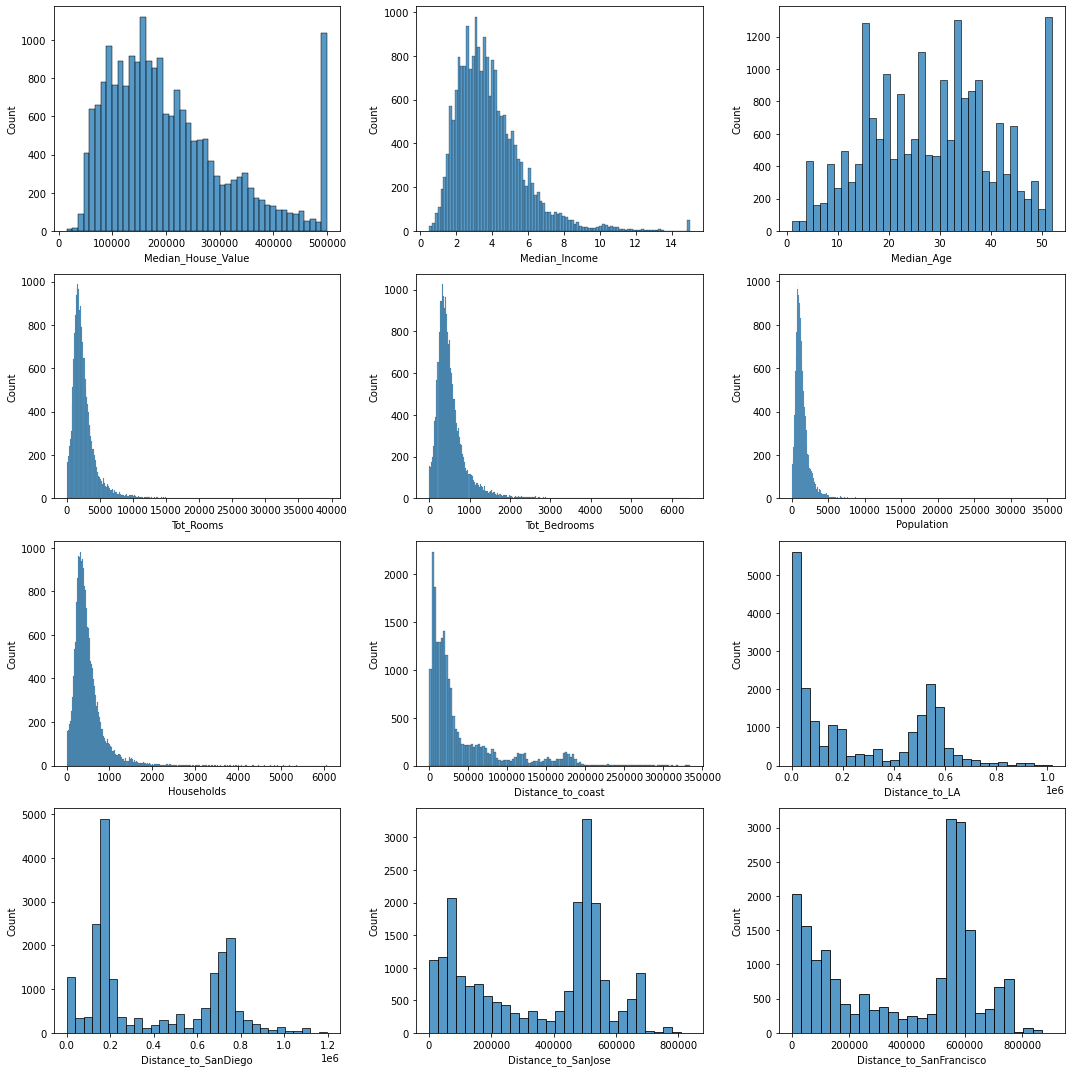

In [9]:
# Display a histogram for each value except Latitude and Longitude
fig, ax = plt.subplots(4, 3, figsize=[15,15])
sns.histplot(data=df, x="Median_House_Value", ax=ax[0, 0])
sns.histplot(data=df, x="Median_Income", ax=ax[0, 1])
sns.histplot(data=df, x="Median_Age", ax=ax[0, 2])
sns.histplot(data=df, x="Tot_Rooms", ax=ax[1, 0])
sns.histplot(data=df, x="Tot_Bedrooms", ax=ax[1, 1])
sns.histplot(data=df, x="Population", ax=ax[1, 2])
sns.histplot(data=df, x="Households", ax=ax[2, 0])
sns.histplot(data=df, x="Distance_to_coast", ax=ax[2, 1])
sns.histplot(data=df, x="Distance_to_LA", ax=ax[2, 2])
sns.histplot(data=df, x="Distance_to_SanDiego", ax=ax[3, 0])
sns.histplot(data=df, x="Distance_to_SanJose", ax=ax[3, 1])
sns.histplot(data=df, x="Distance_to_SanFrancisco", ax=ax[3, 2])
fig.tight_layout()
plt.show()

A few things in these histograms we should notice:

* The attributes have very different scales - we should perform feature scaling;

* Many histograms are tail heavy - they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We need to transform these to have more bell-shaped distributions.

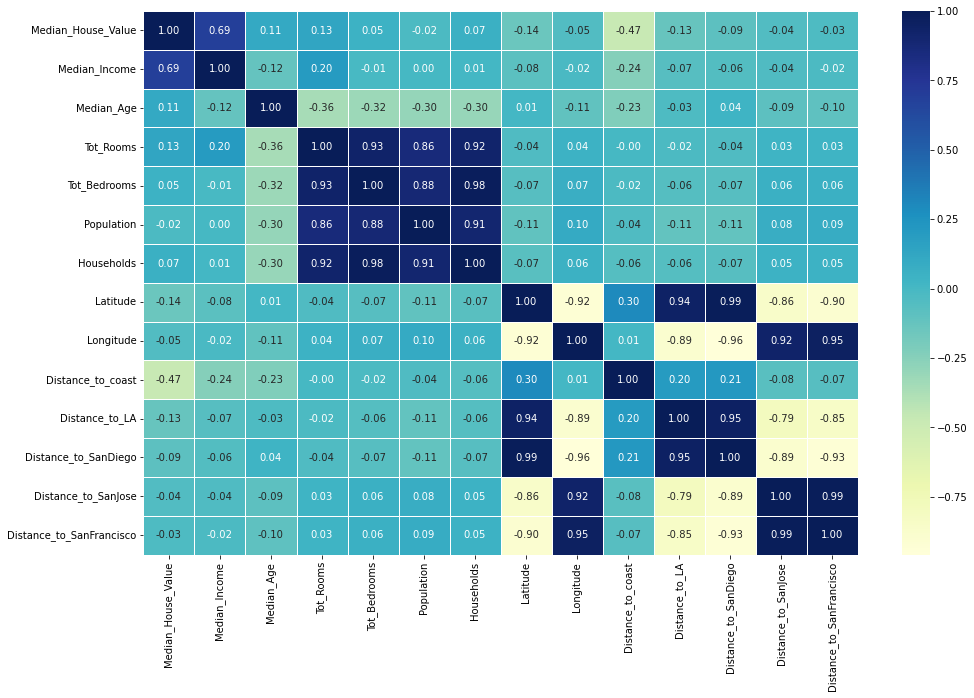

In [10]:
# Make correlation matrix a litle prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(16, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [11]:
corr_matrix["Median_House_Value"].sort_values(ascending=False)

Median_House_Value          1.000000
Median_Income               0.688075
Tot_Rooms                   0.134153
Median_Age                  0.105623
Households                  0.065843
Tot_Bedrooms                0.050594
Population                 -0.024650
Distance_to_SanFrancisco   -0.030559
Distance_to_SanJose        -0.041590
Longitude                  -0.045967
Distance_to_SanDiego       -0.092510
Distance_to_LA             -0.130678
Latitude                   -0.144160
Distance_to_coast          -0.469350
Name: Median_House_Value, dtype: float64

We can see that Median_Income and Distance_to_coast are the most correlated to Median_House_Value

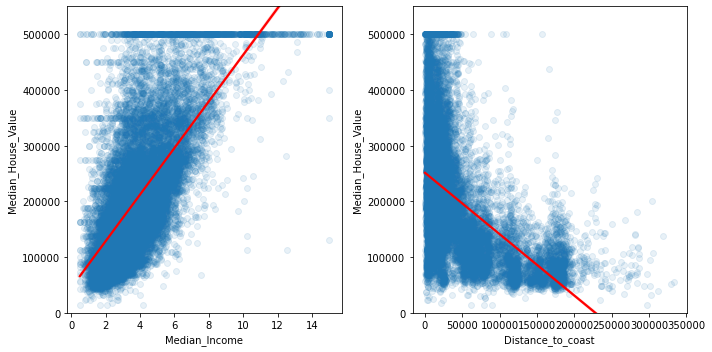

In [12]:
# Plot Median Income and Distance to Coast
fig, ax = plt.subplots(1, 2, figsize=[10, 5])
sns.regplot(data=df, x="Median_Income", y="Median_House_Value",
            line_kws={"color": "red"}, scatter_kws={"alpha":0.1}, ax=ax[0])
sns.regplot(data=df, x="Distance_to_coast",
            y="Median_House_Value", line_kws={"color": "red"},
            scatter_kws={"alpha":0.1}, ax=ax[1])
ax[0].set(ylim=(0, 550000))
ax[1].set(ylim=(0, 550000))
fig.tight_layout()
plt.show()

## Visualizing Geographical Data

Since there is geographical information (latitude and longitude), let"s create a scatterplot of all districts to visualize the data:

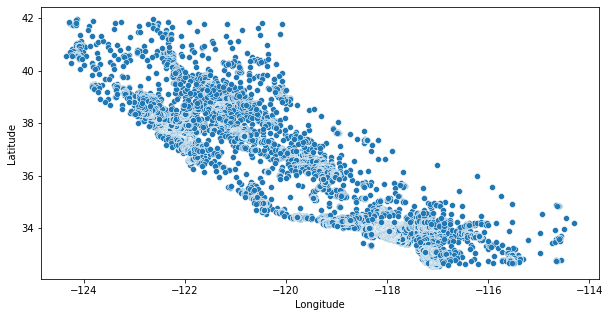

In [13]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="Longitude", y="Latitude")
plt.show()

This looks like California all right, but other than that it is hard to see any particular pattern. let"s visualize the places where there is a high density of data points:

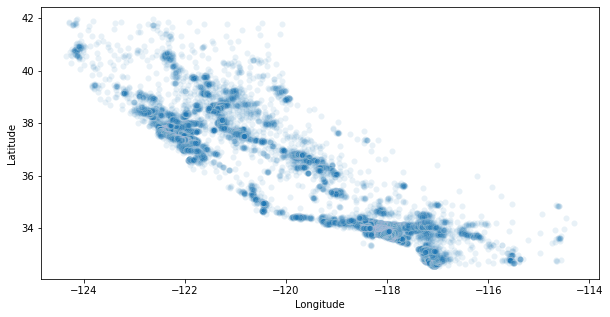

In [14]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="Longitude", y="Latitude", alpha=0.1)
plt.show()

Now we can clearly see the high-density areas, namely the Bay Area and around Los Angeles and San Diego, plus a long line of fairly high density in the Central Valley, in particular around Sacramento and Fresno.

Lastly let"s add the housing prices and district population to the scatter plot:

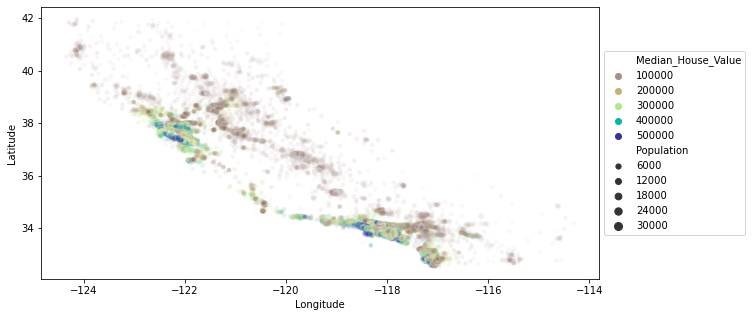

In [15]:
plt.figure(figsize=(10, 5))
g = sns.scatterplot(data=df, x="Longitude", y="Latitude",
                    hue="Median_House_Value", size="Population",
                    alpha=0.1, palette="terrain_r")
g.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

As we can see the housing prices are very much related to the location (e.g., close to the ocean) and to the population density.

## Determining Normality

Making our target variable normally distributed often will lead to better results

If our target is not normally distributed, we can apply a transformation to it and then fit our regression to predict the transformed values.

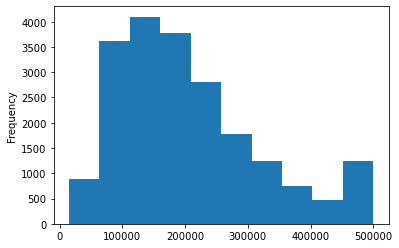

In [16]:
# Chech distribution of the MEDV column with a histogram
df.Median_House_Value.plot.hist();

Does not look normal due to that right tail. Let's try to verify statistically:

In [17]:
normaltest(df.Median_House_Value.values)

NormaltestResult(statistic=2430.931051066072, pvalue=0.0)

Linear Regression assumes a normally distributed residuals which can be aided by transforming y variable. Let's try some common transformations to try and get y to be normally distributed:

* Log;
* Square root;
* Box cox.

In [18]:
## Apply np.log() to target variable Median_House_Value

log_medv = np.log(df.Median_House_Value)

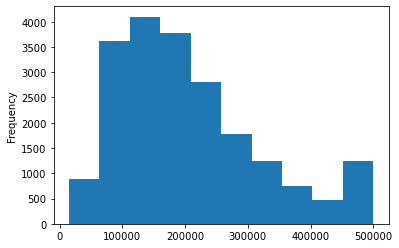

In [19]:
df.Median_House_Value.plot.hist();

In [20]:
normaltest(log_medv)

NormaltestResult(statistic=359.5441835709363, pvalue=8.432814311339089e-79)

Conclusion: closer, but still not normal.

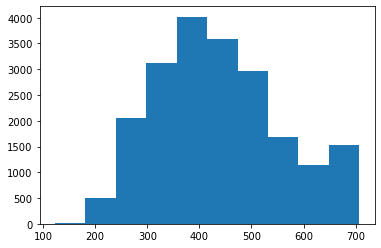

In [21]:
# Apply the square root transformation to the Boston data target and test whether the result is normally distributed.
sqrt_medv = np.sqrt(df.Median_House_Value)
plt.hist(sqrt_medv);

In [22]:
normaltest(sqrt_medv)

NormaltestResult(statistic=851.8425227299555, pvalue=1.0586355256019327e-185)

## Modelling

In [23]:
# Split data into x and y
X = df.drop(["Median_House_Value","Latitude", "Longitude"], axis=1)

y = df["Median_House_Value"]

In [24]:
X

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,8.3252,41,880,129,322,126,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,8.3014,21,7099,1106,2401,1138,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,7.2574,52,1467,190,496,177,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,5.6431,52,1274,235,558,219,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,3.8462,52,1627,280,565,259,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,1665,374,845,330,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,2.5568,18,697,150,356,114,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,1.7000,17,2254,485,1007,433,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,1.8672,18,1860,409,741,349,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


In [25]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: Median_House_Value, Length: 20640, dtype: float64

In [26]:
# split data into train and test sets
np.random.seed(42)

# split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
X_train

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
14196,3.2596,33,3126,627,2300,623,12116.208072,187011.810759,12280.841509,678476.213531,746477.057923
8267,3.8125,49,3382,787,1314,756,2155.281728,32319.244177,149572.305235,520697.455568,588673.823266
17445,4.1563,4,1897,331,915,336,13455.146557,216117.671544,375504.548482,323507.586182,387965.070983
14265,1.9425,36,1421,367,1418,355,5214.687038,184461.172514,5571.282372,675484.355295,743459.721900
2271,3.5542,43,2382,431,874,380,176663.234590,334484.232437,512157.659745,195724.414620,257705.081869
...,...,...,...,...,...,...,...,...,...,...,...
11284,6.3700,35,1330,201,658,217,12864.492584,40019.707560,139727.044811,531756.235514,599783.704103
11964,3.0500,33,3084,570,1753,449,62967.287930,75062.702751,147161.673571,546147.803990,613968.851604
5390,2.9344,36,2101,569,1756,527,11715.072797,12801.292905,184842.756194,485477.345833,553467.812127
860,5.7192,15,3575,597,1777,559,13858.996090,515808.055643,694699.028968,27824.577268,46750.315127


In [28]:
len(y_train)

16512

Data is splitted, time to build ML model

## Choose Models , fit and score the ML models

Models to load and try:

1. LinearRegression;
2. Lasso;
3. Ridge;
4. Elastic Net;


### Load models

In [29]:
# Put models in a dictionary
models = {"Linear Regression": LinearRegression(),
          "Lasso": Lasso(),
          "Ridge": Ridge(),
          "Elastic Net": ElasticNet(),
          "DecisionTreeRegressor": DecisionTreeRegressor(),
          "RandomForestRegressor": RandomForestRegressor()
         }

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given ML models.
    models: a dict of diff SKlearn ML models;

    """
    # Set random seed
    np.random.seed(42)
    # Make a dict to keep ML scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [30]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\lucya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.983e+13, tolerance: 2.207e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\lucya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.501e+13, tolerance: 2.207e+10
  model = cd_fast.enet_coordinate_descent(


{'Linear Regression': 0.6210468124809596,
 'Lasso': 0.6210470575375127,
 'Ridge': 0.6210471311196406,
 'Elastic Net': 0.6133530486525746,
 'DecisionTreeRegressor': 0.6367384113233662,
 'RandomForestRegressor': 0.8090424009888687}

### Model Comparison

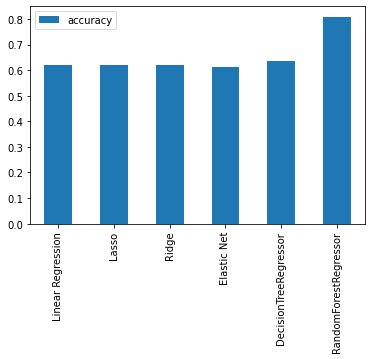

In [31]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

### This is a baseline model

First predictiong aren't always the best
To try next:
- Hyperparameter tunning;
- Cross validation;
- Data standardization;
- PolynomialFeature;




In [32]:
# Score the models and get the RMSE score
r2 = []
model = []
RMSE = []
regressor = [LinearRegression(),Ridge(),Lasso(), ElasticNet(), DecisionTreeRegressor(), RandomForestRegressor()]

for obj in regressor:
    model_name = type(obj).__name__
    obj.fit(X_train,y_train)
    predict=obj.predict(X_test)
    r2.append(r2_score(y_test,predict))
    model.append(model_name)
    RMSE.append(mean_squared_error(y_test, predict, squared=False))
    
models = pd.DataFrame({'Model':model, 'r2':r2, 'RMSE':RMSE})
print(models)

C:\Users\lucya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.983e+13, tolerance: 2.207e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\lucya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.501e+13, tolerance: 2.207e+10
  model = cd_fast.enet_coordinate_descent(


                   Model        r2          RMSE
0       LinearRegression  0.621047  70468.692287
1                  Ridge  0.621047  70468.662660
2                  Lasso  0.621047  70468.669502
3             ElasticNet  0.613353  71180.449314
4  DecisionTreeRegressor  0.643781  68322.259804
5  RandomForestRegressor  0.809152  50008.929435


Text(0.5, 1.0, 'RMSE for models')

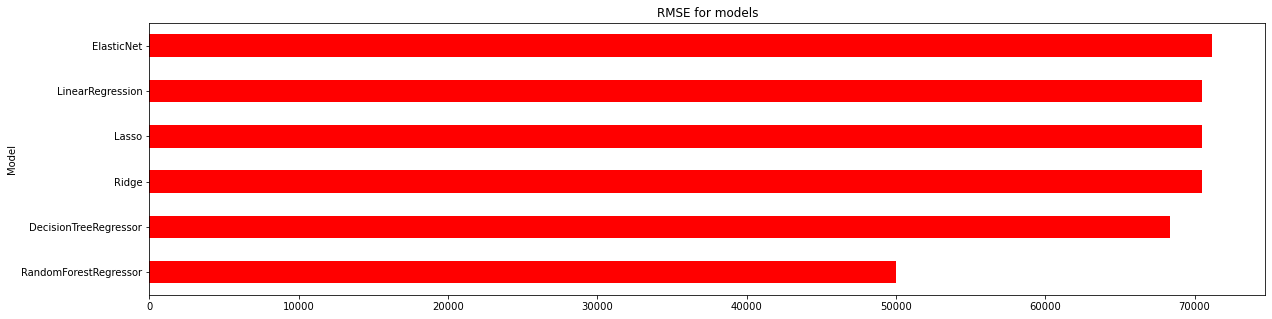

In [33]:
# Plot RMSE scores by model
models = models.set_index('Model')
plt.figure(figsize=(20,5))
models['RMSE'].sort_values().plot(kind='barh', color='r', align='center')
plt.title('RMSE for models')

# Can this scores be improved?

Let's see!

Let's try to do the following to try improve Ridge and Lasso:
* Chain multiple data processing steps together using Pipeline
* Use the KFolds object to split data into multiple folds.
* Hyperparametre tunning;
* Perform cross validation using SciKit Learn with cross_val_predict and GridSearchCV

In [34]:
# set up splits for KFold
kf = KFold(shuffle=True, random_state=2425, n_splits=5)

### `Pipeline` and `cross_val_predict`
Pipeline lets you chain together multiple operators on your data that both have a fit method.

In [35]:
s = StandardScaler()
rd = Ridge()
las = Lasso()

In [74]:
# Combine multiple processing steps into a Pipeline
from sklearn.pipeline import make_pipeline

estimator = make_pipeline(StandardScaler(with_mean=False), Lasso())

In [75]:
predictions = cross_val_predict(estimator, X, y, cv=kf)

C:\Users\lucya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.189e+11, tolerance: 2.192e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\lucya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.229e+11, tolerance: 2.213e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\lucya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.861e+11, toleranc

In [76]:
r2_score(y, predictions)

0.633787722611705

#### When we are done, estimator is still not fitted. If we want to predict on new data, we still have to train our estimator.

### Hyperparameter tuning, pipeline and Polynomialfeature on Lasso

In [39]:
# Use this function to generate a list of length 10 called alphas for hyperparameter tuning:
alphas = np.geomspace(1e-9, 1e0, num=10)
alphas

# The code below tunes the alpha hyperparameter for Lasso regression.
scores = []
coefs = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

In [40]:
list(zip(alphas,scores))

[(1e-09, 0.6337872886094582),
 (1e-08, 0.6337872886094622),
 (1e-07, 0.6337872886095028),
 (1e-06, 0.6337872886099084),
 (1e-05, 0.6337872886139648),
 (0.0001, 0.633787288654531),
 (0.001, 0.6337872890601746),
 (0.01, 0.6337872931125371),
 (0.1, 0.6337873332675902),
 (1.0, 0.6337876975339753)]

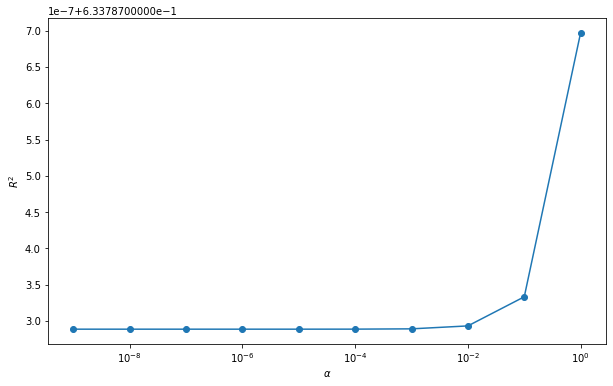

In [41]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [ ]:
# Add PolynomialFeatures to this Pipeline, and re-run the cross validation with the PolynomialFeatures added.
pf = PolynomialFeatures(degree=3)

scores = []
alphas = np.geomspace(0.01, 6.0, 30)
for alpha in alphas:
    # Gradiant Descend --> max_iter
    las = Lasso(alpha=alpha, max_iter=10000)
    
    estimator = Pipeline([
        #Order of steps in Pipeline matters. Scaler vs higher degree
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)
    

In [ ]:
alphas

In [ ]:
scores

In [ ]:
plt.semilogx(alphas, scores);

In [135]:
# make the model and train and test it on ALL the data
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=4)),
                    ("lasso_regression", Lasso(alpha=0.1))])

best_estimator.fit(X_train, y_train)
best_estimator.score(X_test, y_test)

C:\Users\lucya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.303e+13, tolerance: 2.207e+10
  model = cd_fast.enet_coordinate_descent(


0.7371314703162203

In [130]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

hparams = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(0.001, 20, 30)
}

grid = GridSearchCV(estimator, hparams, cv=kf)

In [131]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=2425, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([1.00000000e-03, 1.40705599e-03, 1.97980656e-03, 2.78569867e-03,
       3.91963400e-...3, 1.09189192e-02,
       1.53635307e-02, 2.16173479e-02, 3.04168189e-02, 4.27981672e-02,
       6.02194175e-02, 8.47320920e-02, 1.19222798e-01, 1.67753151e-01,
       2.36038076e-01, 3.32118789e-01, 4.67309731e-01, 6.57530956e-01,
       9.25182870e-01, 1.30178410e+00, 1.83168311e+00, 2.57728069e+00,
       3.62637824e+00, 5.10251722e+00, 7.17952741e+00, 1.01019970e+01,
       1.42140755e+01, 2.00000000e+01])})

In [132]:
grid.best_score_, grid.best_params_

(0.6975528634179903,
 {'polynomial_features__degree': 2, 'ridge_regression__alpha': 0.001})

In [133]:
y_predict = grid.predict(X)

In [134]:
# This includes both in-sample and out-of-sample
r2_score(y, y_predict)

0.7261445855426811

### Hyperparameter tuning, pipeline and Polynomialfeature on Ridge

In [152]:
# from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator2 = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

hparams = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(0.01, 20, 30)
}

grid = GridSearchCV(estimator2, hparams, cv=kf)

In [153]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=2425, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([1.00000000e-02, 1.29965661e-02, 1.68910731e-02, 2.19525948e-02,
       2.85308350e-...2, 6.26325861e-02,
       8.14008546e-02, 1.05793159e-01, 1.37494778e-01, 1.78695998e-01,
       2.32243435e-01, 3.01836716e-01, 3.92284084e-01, 5.09834603e-01,
       6.62609913e-01, 8.61165354e-01, 1.11921925e+00, 1.45460069e+00,
       1.89048141e+00, 2.45697666e+00, 3.19322596e+00, 4.15009724e+00,
       5.39370131e+00, 7.00995958e+00, 9.11054031e+00, 1.18405740e+01,
       1.53886802e+01, 2.00000000e+01])})

In [154]:
grid.best_score_, grid.best_params_

(0.6952080750206986,
 {'polynomial_features__degree': 2, 'ridge_regression__alpha': 0.01})

In [155]:
y_predict = grid.predict(X)

In [156]:
# This includes both in-sample and out-of-sample
r2_score(y, y_predict)

0.7240071537338322